<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load Data</a></span></li><li><span><a href="#Plot-Data" data-toc-modified-id="Plot-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Plot Data</a></span><ul class="toc-item"><li><span><a href="#Line-Plot" data-toc-modified-id="Line-Plot-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Line Plot</a></span></li><li><span><a href="#Resampling" data-toc-modified-id="Resampling-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Resampling</a></span></li><li><span><a href="#Lag-plot" data-toc-modified-id="Lag-plot-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Lag plot</a></span></li><li><span><a href="#Autocorrelation-plot" data-toc-modified-id="Autocorrelation-plot-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Autocorrelation plot</a></span></li></ul></li></ul></div>

* 时间序列变量由特定于某个时间点的值填充。时间是线性的，并且是无限细粒度的，所以时间序列值实际上是区间变量的一种特殊情况。

* 原文link： https://www.kaggle.com/residentmario/time-series-plotting-optional/data

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


## Load Data

* 股票数据

In [2]:
stocks = pd.read_csv("nyse/prices.csv", parse_dates=['date']) # 解析索引
stocks = stocks[stocks['symbol'] == "GOOG"].set_index('date') # Set the DataFrame index using existing columns.
stocks.head()

,symbol,open,close,low,high,volume
date,,,,,,
2010-01-04,GOOG,626.951088,626.751061,624.241073,629.511067,3927000.0
2010-01-05,GOOG,627.181073,623.991055,621.541045,627.841071,6031900.0
2010-01-06,GOOG,625.861078,608.261023,606.361042,625.861078,7987100.0
2010-01-07,GOOG,609.401025,594.101005,592.651008,610.001045,12876600.0
2010-01-08,GOOG,592.000997,602.021036,589.110988,603.251034,9483900.0


* animal shelter outcomes

In [10]:
shelter_outcomes = pd.read_csv(
    "austin-animal-center-shelter-outcomes-and/aac_shelter_outcomes.csv", 
    parse_dates=['date_of_birth', 'datetime']
)
shelter_outcomes.head()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07,2014-07-22 16:04:00,2014-07-22T16:04:00,NaN,Partner,Transfer,Intact Male
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06,2013-11-07 11:47:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31,2014-06-03 14:20:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,Neutered Male
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02,2014-06-15 15:50:00,2014-06-15T15:50:00,Monday,Partner,Transfer,Neutered Male
4,5 months,A683115,Other,Bat Mix,Brown,2014-01-07,2014-07-07 14:04:00,2014-07-07T14:04:00,NaN,Rabies Risk,Euthanasia,Unknown


## Plot Data

### Line Plot

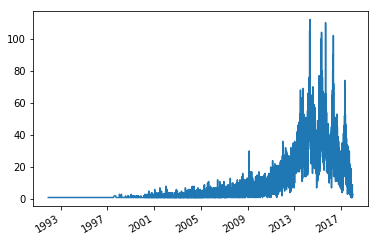

In [11]:
shelter_outcomes['date_of_birth'].value_counts().sort_values().plot.line()

* 2015 年 动物出生的较多

### Resampling 
* 目前的数据是时间刻度是 day，我们修改为 year

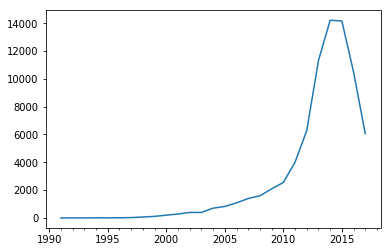

In [12]:
shelter_outcomes['date_of_birth'].value_counts().resample('Y').sum().plot.line()

* 注意到 pandas 正在自动调整x轴上的标签以匹配我们的输出类型。
这是因为Pandas具有“时间意识”;
当我们有相隔一年的数据点时，我们只想看到标签上的年份，而不是其他!

### Lag plot

* 数据点和数据集中的前一个点进行比较

* 参考： https://www.statisticshowto.datasciencecentral.com/lag-plot/

Lag plots allow you to check for:

* Model suitability.
* Outliers (data points with extremely high or low values).
* Randomness (data without a pattern).
* Serial correlation (where error terms in a time series transfer from one period to another).
* Seasonality (periodic fluctuations in time series data that happens at regular periods).

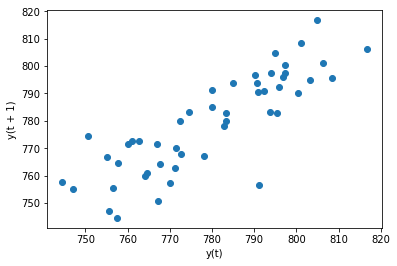

In [13]:
from pandas.plotting import lag_plot

lag_plot(stocks['open'].tail(50))

* 790 附近就存在一个异常的点

* 数据近似线性，说明不是随机的

* 数据显示线性模式，则表明存在自相关。正线性趋势(即从左到右向上)表明正自相关;负线性趋势(从左到右向下)暗示负自相关。数据在对角线上聚集得越紧密，自相关性越强;完全自相关的数据将聚集在一条对角线上。

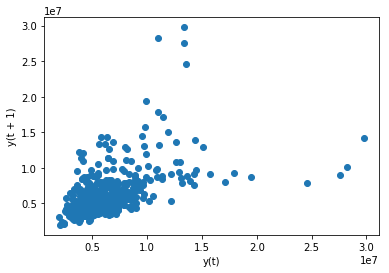

In [18]:
lag_plot(stocks['volume'].head(500))

### Autocorrelation plot 

* 自相关系数, 就是用来表达一组数据前后数据 (自己和自己) 的相关性的
默认是 和后一位


![](http://pqvlt7eed.bkt.clouddn.com/f7m37.jpg)

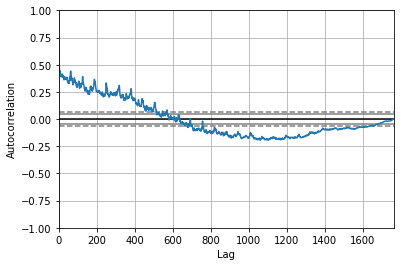

In [19]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(stocks['volume'])